In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import numpy as np
import csv
drive.mount('/gdrive')
url='/gdrive/My Drive/Mali/fifa20.csv'
data=pd.read_csv(url)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


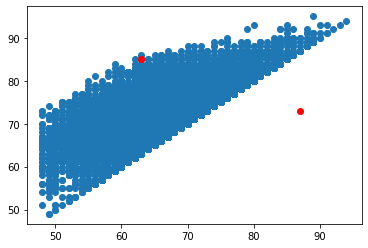

In [2]:
#menentukan titik k means secara random 
import random as rd
rdx1=rd.randint(55,87)
rdy1=rd.randint(55,87)
rdx2=rd.randint(55,87)
rdy2=rd.randint(55,87)
titik1=[]
titik2=[]
titik1.append(rdx1)
titik1.append(rdx2)
titik2.append(rdy1)
titik2.append(rdy2)
centroids=[]
centroids.append(titik1)
centroids.append(titik2)
plt.scatter(data['overall'],data['potential'])
plt.scatter(centroids[0],centroids[1],c='red')
plt.show()

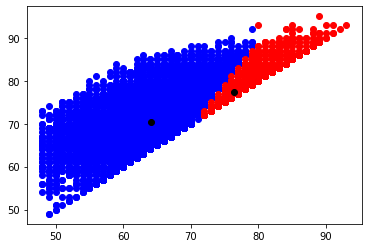

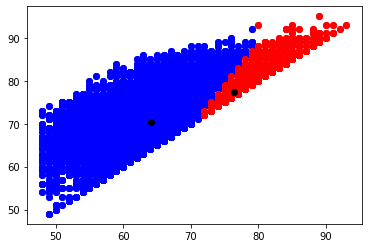

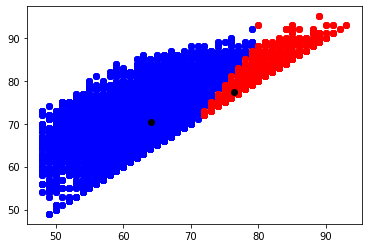

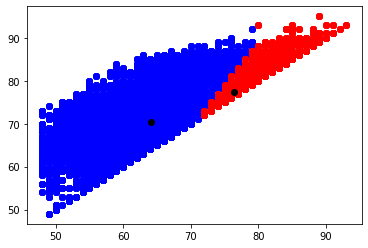

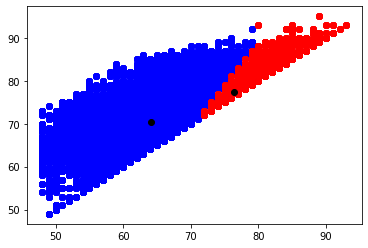

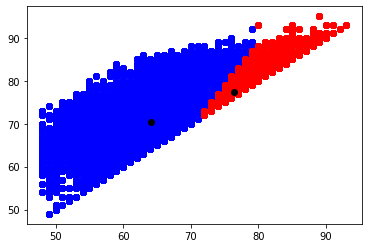

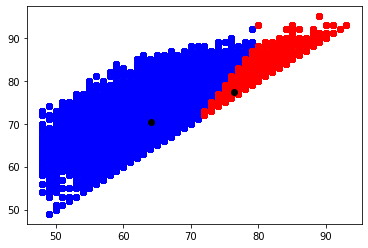

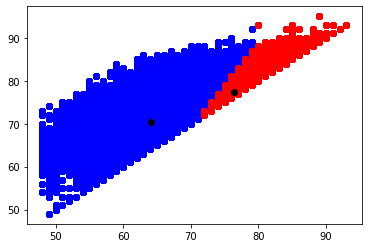

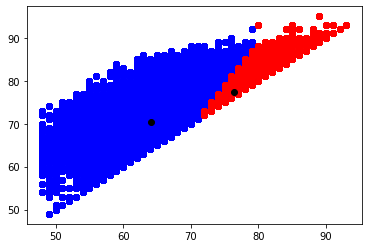

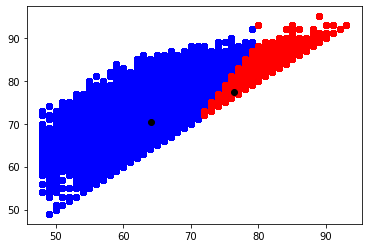

In [6]:
#melakukan pengujian k means hanya diulang sebanyak 10x dikarenakan google colabs menolak untuk hasil yang tidak ada ujungnya dan perpindahannya hanya sedikit
resultk1x=[]
resultk1y=[]
resultk2x=[]
resultk2y=[]
sumbux=[]
sumbuy=[]
hasilk1=[]
hasilk2=[]

def kmean():
  for i in range(len(data)):
    sumbux.append(data['overall'][i])
    sumbuy.append(data['potential'][i])

  for j in range(len(data)-1):
    j=j+1
    x=(sumbux[j]-centroids[0][0])**2
    y=(sumbuy[j]-centroids[1][0])**2
    hasil1=(np.sqrt(x+y))
    hasilk1.append(hasil1)

    x1=(sumbux[j]-centroids[0][1])**2
    y1=(sumbuy[j]-centroids[1][1])**2
    hasil2=(np.sqrt(x1+y1))
    hasilk2.append(hasil2)
  for j in range(len(data)-2):
    j=j+1
    if hasilk1[j]>hasilk2[j]:
        resultk1x.append(sumbux[j])
        resultk1y.append(sumbuy[j])
    if hasilk2[j]>hasilk1[j]:
        resultk2x.append(sumbux[j])
        resultk2y.append(sumbuy[j])
    
  w=np.mean(resultk1x)
  s=np.mean(resultk1y)
  u=np.mean(resultk2x)
  e=np.mean(resultk2y)
  
  centroids[0][0]=w
  centroids[0][1]=u
  centroids[1][0]=s
  centroids[1][1]=e
  plt.scatter(resultk1x,resultk1y,c='blue') 
  plt.scatter(resultk2x,resultk2y,c='red')
  plt.scatter(centroids[0],centroids[1],c='black')
  plt.show()
for i in range(10):
  kmean()

In [7]:
#menghitung sse yang dihasilkan dari tiap sumbu
w=np.mean(resultk1x)
s=np.mean(resultk1y)
u=np.mean(resultk2x)
e=np.mean(resultk2y)
d1x=[]
d1y=[]
d2x=[]
d2y=[]
i=0
for i in range(len(resultk1x)-1):
  i=i+1
  dev1x=resultk1x[i]-w
  de1x=dev1x**2
  d1x.append(de1x)
for i in range(len(d1x)-1):
  sse1x=d1x[i]+d1x[i+1]
for i in range(len(resultk1y)-1):
  i=i+1
  dev1y=resultk1y[i]-s
  de1y=dev1y**2
  d1y.append(de1y)
for i in range(len(d1y)-1):
  sse1y=d1y[i]+d1y[i+1]

print ('SSE sumbu x k-means biru:', sse1x)
print ('SSE sumbu y k-means biru:', sse1y)

for i in range(len(resultk2x)-1):
  i=i+1
  dev2x=resultk2x[i]-u
  de2x=dev2x**2
  d2x.append(de2x)
for i in range(len(d2x)-1):
  sse2x=d2x[i]+d2x[i+1]
for i in range(len(resultk2y)-1):
  i=i+1
  dev2y=resultk2y[i]-e
  de2y=dev2y**2
  d2y.append(de2y)
for i in range(len(d2y)-1):
  sse2y=d2y[i]+d2y[i+1]

print ('SSE sumbu x k-means merah:', sse2x)
print ('SSE sumbu y k-means merah:', sse2y)



SSE sumbu x k-means biru: 516.6257650999372
SSE sumbu y k-means biru: 475.39059753472276
SSE sumbu x k-means merah: 39.68029081518779
SSE sumbu y k-means merah: 56.10150891632361


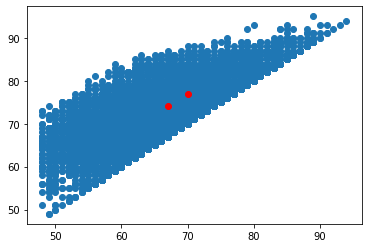

In [9]:
#pengujian k means jika diambil dari salah satu data yang tersedia
rowx=[]
rowy=[]
overall=data['overall']
potential=data['potential']

for i in range(2):
  a=rd.randint(0,len(data))
  rowx.append(overall[a])
  rowy.append(potential[a])
centroids1=[]
centroids1.append(rowx)
centroids1.append(rowy)
plt.scatter(data['overall'],data['potential'])
plt.scatter(centroids1[0],centroids1[1], c='red')
plt.show()

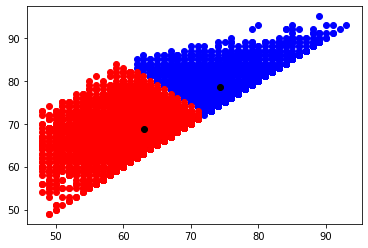

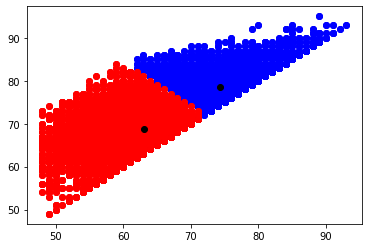

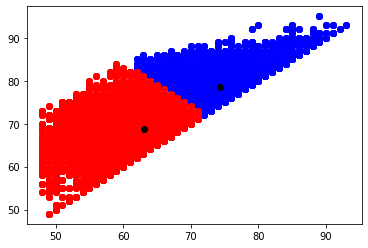

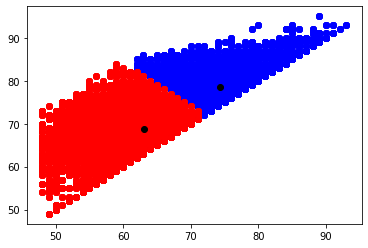

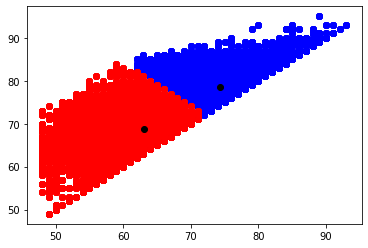

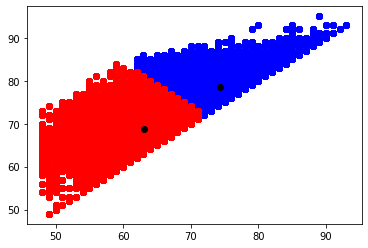

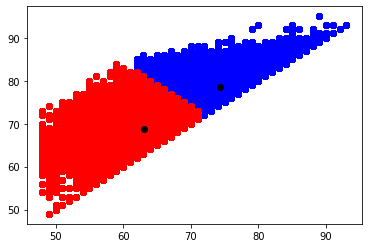

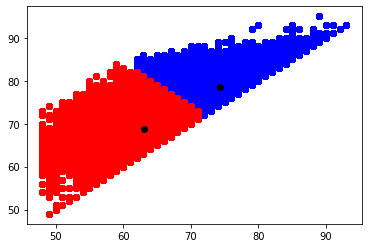

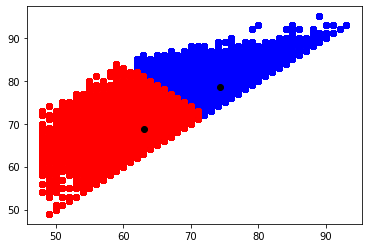

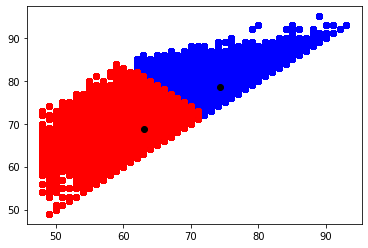

In [11]:
#melakukan pengujian k means hanya diulang sebanyak 10x dikarenakan google colabs menolak untuk hasil yang tidak ada ujungnya dan perpindahannya hanya sedikit
hasilk1x=[]
hasilk1y=[]
hasilk2x=[]
hasilk2y=[]
resultk1=[]
resultk2=[]


def kmean1():
  for j in range(len(data)-1):
    j=j+1
    x=(sumbux[j]-centroids1[0][0])**2
    y=(sumbuy[j]-centroids1[1][0])**2
    hasil1=(np.sqrt(x+y))
    resultk1.append(hasil1)

    x1=(sumbux[j]-centroids1[0][1])**2
    y1=(sumbuy[j]-centroids1[1][1])**2
    hasil2=(np.sqrt(x1+y1))
    resultk2.append(hasil2)

  for j in range(len(data)-2):
    j=j+1
    if resultk1[j]>resultk2[j]:
        hasilk1x.append(sumbux[j])
        hasilk1y.append(sumbuy[j])
    if resultk2[j]>resultk1[j]:
        hasilk2x.append(sumbux[j])
        hasilk2y.append(sumbuy[j])
  w=np.mean(hasilk1x)
  s=np.mean(hasilk1y)
  u=np.mean(hasilk2x)
  e=np.mean(hasilk2y)
  centroids1[0][0]=w
  centroids1[0][1]=u
  centroids1[1][0]=s
  centroids1[1][1]=e
  plt.scatter(hasilk1x,hasilk1y,c='blue') 
  plt.scatter(hasilk2x,hasilk2y,c='red')
  plt.scatter(centroids1[0],centroids1[1],c='black')
  plt.show()
for i in range(10):
  kmean1()

In [12]:
#menghitung sse yang dihasilkan tiap sumbu
w=np.mean(hasilk1x)
s=np.mean(hasilk1y)
u=np.mean(hasilk2x)
e=np.mean(hasilk2y)
dx1=[]
dy1=[]
dx2=[]
dy2=[]
i=0
for i in range(len(hasilk1x)-1):
  i=i+1
  devx1=hasilk1x[i]-w
  dex1=devx1**2
  dx1.append(dex1)
for i in range(len(dx1)-1):
  ssex1=dx1[i]+dx1[i+1]
for i in range(len(hasilk1y)-1):
  i=i+1
  devy1=hasilk1y[i]-s
  dey1=devy1**2
  dy1.append(dey1)
for i in range(len(dy1)-1):
  ssey1=dy1[i]+dy1[i+1]

print ('SSE sumbu x k-means biru:', ssex1)
print ('SSE sumbu y k-means biru:', ssey1)

for i in range(len(hasilk2x)-1):
  i=i+1
  devx2=hasilk2x[i]-u
  dex2=devx2**2
  dx2.append(dex2)
for i in range(len(dx2)-1):
  ssex2=dx2[i]+dx2[i+1]
for i in range(len(hasilk2y)-1):
  i=i+1
  devy2=hasilk2y[i]-e
  dey2=devy2**2
  dy2.append(dey2)
for i in range(len(dy2)-1):
  ssey2=dy2[i]+dy2[i+1]

print ('SSE sumbu x k-means merah:', ssex2)
print ('SSE sumbu y k-means merah:', ssey2)


SSE sumbu x k-means biru: 302.54639298455487
SSE sumbu y k-means biru: 48.65235354484783
SSE sumbu x k-means merah: 450.9986790605793
SSE sumbu y k-means merah: 380.95879247015614


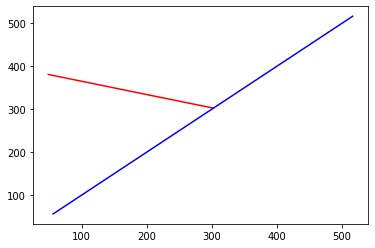

In [13]:
#gambaran sse yang dihasilkan jika menggunakan titik random berwarna merah dan titik random dari data yang diambil berwarna biru
plt.plot([ssex1,ssey1], [ssex1,ssey2], c='Red')
plt.plot([sse1x,sse2y], [sse1x,sse2y], c='Blue')
plt.show()